In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# show up charts when export notebooks
%matplotlib inline

## Dataset used: [Pokemon stats](https://www.kaggle.com/datasets/abcsds/pokemon)

In [3]:
data=pd.read_csv('Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data.isna().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [5]:
data.shape

(800, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [9]:
types = data['Type 1'].isin(['Grass', 'Fire', 'Water']) # True for pokemon with type1 as 'Grass', 'Fire or 'Water
types

0       True
1       True
2       True
3       True
4       True
       ...  
795    False
796    False
797    False
798    False
799     True
Name: Type 1, Length: 800, dtype: bool

In [11]:
data[types] # Pokemon with type1 as 'Grass', 'Fire or 'Water

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False
741,673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False
762,692,Clauncher,Water,NaN,330,50,53,62,58,63,44,6,False
763,693,Clawitzer,Water,NaN,500,71,73,88,120,89,59,6,False


In [14]:
drop_cols=['Type 1','Type 2','Generation','Legendary','#']
pokemon=data.drop(columns=drop_cols)

In [30]:
pokemon.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cen_x,cen_y,c
0,Bulbasaur,318,45,49,49,65,65,45,0,58.021739,53.285024,blue
1,Ivysaur,405,60,62,63,80,80,60,0,58.021739,53.285024,blue
2,Venusaur,525,80,82,83,100,100,80,2,80.423913,110.304348,red
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,2,80.423913,110.304348,red
4,Charmander,309,39,52,43,60,50,65,0,58.021739,53.285024,blue


# Clustering

In [58]:
from sklearn.cluster import KMeans
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
pokemon['cluster'] = kmeans.fit_predict(pokemon[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
print(cen_x)
## add to df
pokemon['cen_x'] = pokemon.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
pokemon['cen_y'] = pokemon.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['blue', 'green', 'red']
pokemon['c'] = pokemon.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[58.02173913043481, 120.70297029702974, 80.42391304347827]


In [29]:
pokemon.head(20)

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,cluster,cen_x,cen_y,c
0,Bulbasaur,318,45,49,49,65,65,45,0,58.021739,53.285024,blue
1,Ivysaur,405,60,62,63,80,80,60,0,58.021739,53.285024,blue
2,Venusaur,525,80,82,83,100,100,80,2,80.423913,110.304348,red
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,2,80.423913,110.304348,red
4,Charmander,309,39,52,43,60,50,65,0,58.021739,53.285024,blue
5,Charmeleon,405,58,64,58,80,65,80,0,58.021739,53.285024,blue
6,Charizard,534,78,84,78,109,85,100,2,80.423913,110.304348,red
7,CharizardMega Charizard X,634,78,130,111,130,85,100,1,120.702970,82.762376,green
8,CharizardMega Charizard Y,634,78,104,78,159,115,100,1,120.702970,82.762376,green
9,Squirtle,314,44,48,65,50,64,43,0,58.021739,53.285024,blue


### From the above we can see that Pokemon in Blue clusters have low Attack and Defense, Pokemon in Green clusters have higher Attack than Defense and Pokemon in Red clusters have higher Defence than Attack

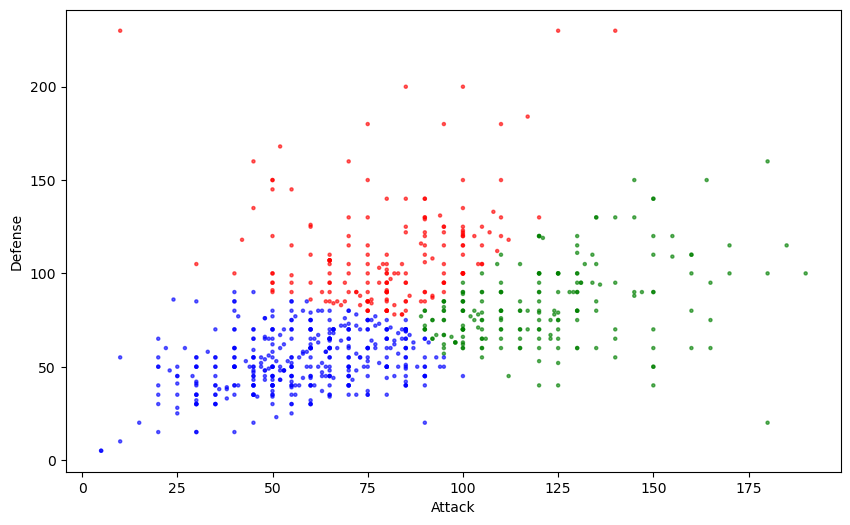

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(pokemon.Attack, pokemon.Defense, c=pokemon.c, alpha = 0.6, s=5)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

## Adding Speed to the plot

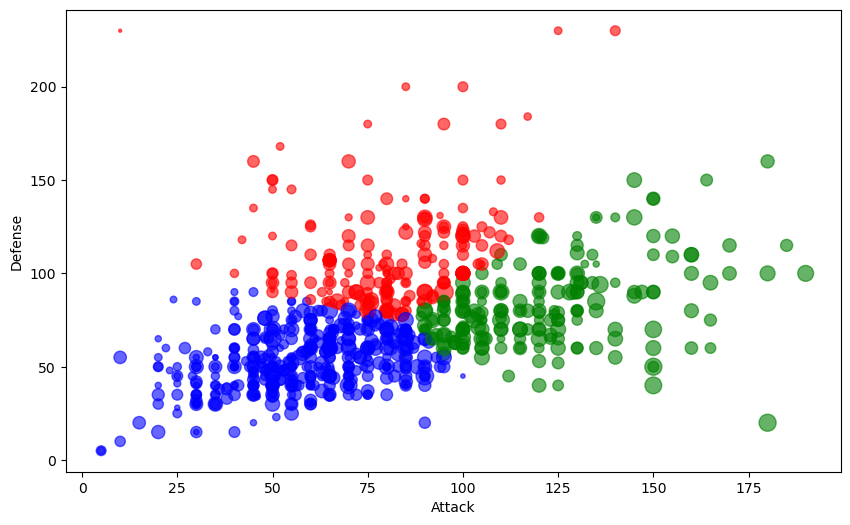

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(pokemon.Attack, pokemon.Defense, c=pokemon.c, alpha = 0.6, s=pokemon.Speed)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

## Dividing into Training and Testing data to test accuracy

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(X_train[['Attack','Defense']])

C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [48]:
kmeans.predict(X_train[['Attack','Defense']])

array([2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0,
       2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0,
       2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0,
       1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2,

In [49]:
train_labels=kmeans.fit_predict(X_train[['Attack','Defense']])

C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rkran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### The silhouette score ranges from -1 to 1, where: <br>A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.<br>A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.<br>A score close to -1 indicates that the object may have been assigned to the wrong cluster.

In [54]:
from sklearn.metrics import silhouette_score
silhouette_score = silhouette_score(X_train[['Attack','Defense']], train_labels)
print(f"Silhoutte Score: {silhouette_score}")

Silhoutte Score: 0.4016732387122646
